In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## The goal for this project is to predict a baseball team's wins in a season using  batting and pitching statistics.

## Data was collected by web scraping using the python program ‘Beautiful Soup’. All pitching and batting statistics were taken from tables available on the website,baseball-reference.com. 

## For this project, statistics were taken for all MLB seasons from 1876 to 2018.  The batting statistics are made up of 28 features while the pitching statistics contain 35 features. 


## READ IN MLB STATS FOR 1876-2018 SEASONS 

In [2]:
# read data from csv file for 2001-2018 MLB seasons
#df = pd.read_csv('MLB_STATS_1900-2018_BP.csv')
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI       float64
SB        float64
CS        float64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP_x     float64
SH        float64
SF        float64
IBB_x     float64
LOB_x     float64
Year        int64
           ...   
CG          int64
ER          int64
ERA       float64
ERA+        int64
FIP       float64
G_y         int64
GF          int64
GS          int64
H_y         int64
H9        float64
HBP_y     float64
HR_y        int64
HR9       float64
IBB_y     float64
IP        float64
L           int64
LOB_y     float64
PAge      float64
R_y         int64
RA/G      float64
SO_y        int64
SO/W      float64
SO9       float64
SV          int64
W         

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
2004    30
2006    30
2008    30
2010    30
2012    30
2014    30
2016    30
2018    30
2005    30
2013    30
1999    30
2001    30
2003    30
2007    30
2009    30
2011    30
1993    28
1997    28
1996    28
1994    28
1995    28
1992    26
1990    26
1988    26
1986    26
        ..
1941    16
1905    16
1911    16
1901    16
1883    16
1957    16
1955    16
1953    16
1951    16
1947    16
1949    16
1885    16
1887    16
1889    16
1882    14
1892    12
1897    12
1895    12
1893    12
1894    12
1896    12
1898    12
1899    12
1881     8
1900     8
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

## Examine the data for null values.

In [9]:
#df.SV.isna().sum()
df.isnull().sum()

Tm           0
#Bat         0
BatAge       0
R/G          0
G_x          0
PA           0
AB           0
R_x          0
H_x          0
2B           0
3B           0
HR_x         0
RBI         15
SB         123
CS         717
BB_x         0
SO_x         0
BA           0
OBP          0
SLG          0
OPS          0
OPS+         0
TB           0
GDP        909
HBP_x      110
SH         253
SF        1197
IBB_x      989
LOB_x      445
Year         0
          ... 
CG           0
ER           0
ERA          0
ERA+         0
FIP          0
G_y          0
GF           0
GS           0
H_y          0
H9           0
HBP_y      110
HR_y         0
HR9          0
IBB_y      989
IP           0
L            0
LOB_y      445
PAge         0
R_y          0
RA/G         0
SO_y         0
SO/W         0
SO9          0
SV           0
W            0
W-L%         0
WHIP         0
WP           0
cSho         8
tSho         8
Length: 65, dtype: int64

## Study The Correlation Of Features With Wins.

##  For a regression analysis to predict wins, it would be ideal to select those features that have a high correlation with wins.


In [10]:
correlation = df.corr()

In [11]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
AB        0.599076
R_x       0.626056
H_x       0.649828
2B        0.509120
3B        0.014362
HR_x      0.447111
RBI       0.648062
SB       -0.008447
CS       -0.016638
BB_x      0.586737
SO_x      0.304754
BA        0.353061
OBP       0.533598
SLG       0.521056
OPS       0.564913
OPS+      0.549647
TB        0.649951
GDP       0.077197
HBP_x     0.127109
SH       -0.018893
SF        0.354130
IBB_x     0.354443
LOB_x     0.359822
Year      0.352521
#P        0.186490
            ...   
CG       -0.175771
ER        0.081558
ERA      -0.242158
ERA+      0.563912
FIP      -0.025223
G_y       0.582832
GF        0.356504
GS        0.582657
H_y       0.240439
H9       -0.487337
HBP_y    -0.092135
HR_y      0.256221
HR9       0.207969
IBB_y    -0.050684
IP        0.612138
L        -0.332367
LOB_y     0.042761
PAge      0.390851
R_y      -0.162247
RA/G     -0.607445
SO_y      0.441019
SO/W      0.

In [12]:
type(W_corr)

pandas.core.series.Series

## Correlation of features with wins sorted to display positive and negative correlation.

In [13]:
W_corr.sort_values(ascending=True)

RA/G    -0.607445
H9      -0.487337
WHIP    -0.336374
L       -0.332367
ERA     -0.242158
CG      -0.175771
R_y     -0.162247
WP      -0.107353
HBP_y   -0.092135
IBB_y   -0.050684
FIP     -0.025223
SH      -0.018893
CS      -0.016638
SB      -0.008447
3B       0.014362
BB9      0.037164
LOB_y    0.042761
GDP      0.077197
ER       0.081558
BK       0.119359
HBP_x    0.127109
SO/W     0.148624
#Bat     0.178940
#P       0.186490
HR9      0.207969
R/G      0.224332
BB_y     0.237272
H_y      0.240439
HR_y     0.256221
cSho     0.272929
           ...   
BA       0.353061
SF       0.354130
IBB_x    0.354443
GF       0.356504
LOB_x    0.359822
PAge     0.390851
SO_y     0.441019
HR_x     0.447111
SV       0.482644
BF       0.503418
tSho     0.508369
2B       0.509120
SLG      0.521056
OBP      0.533598
OPS+     0.549647
ERA+     0.563912
OPS      0.564913
GS       0.582657
G_x      0.582830
G_y      0.582832
BB_x     0.586737
AB       0.599076
IP       0.612138
R_x      0.626056
PA       0

## As shown in the above table, Runs Allowed Per Game (RA/G), and hits allowed per innings  pitched multiplied by 9 (H9) have a negative correlation with a team’s wins, which makes perfect sense. 

In [14]:
W_corr.sort_values(ascending=False)

W        1.000000
W-L%     0.819723
TB       0.649951
H_x      0.649828
RBI      0.648062
PA       0.629993
R_x      0.626056
IP       0.612138
AB       0.599076
BB_x     0.586737
G_y      0.582832
G_x      0.582830
GS       0.582657
OPS      0.564913
ERA+     0.563912
OPS+     0.549647
OBP      0.533598
SLG      0.521056
2B       0.509120
tSho     0.508369
BF       0.503418
SV       0.482644
HR_x     0.447111
SO_y     0.441019
PAge     0.390851
LOB_x    0.359822
GF       0.356504
IBB_x    0.354443
SF       0.354130
BA       0.353061
           ...   
cSho     0.272929
HR_y     0.256221
H_y      0.240439
BB_y     0.237272
R/G      0.224332
HR9      0.207969
#P       0.186490
#Bat     0.178940
SO/W     0.148624
HBP_x    0.127109
BK       0.119359
ER       0.081558
GDP      0.077197
LOB_y    0.042761
BB9      0.037164
3B       0.014362
SB      -0.008447
CS      -0.016638
SH      -0.018893
FIP     -0.025223
IBB_y   -0.050684
HBP_y   -0.092135
WP      -0.107353
R_y     -0.162247
CG      -0

## As shown in the above table, Total bases(TB), batting hits(H_x), runs scored (R_x), and runs batted in (RBI) all have a positive correlation with a team’s wins. Total bases (TB) is the sum of all bases obtained from singles, doubles, triples, and home runs. RBI is defined as a  statistic in baseball that measure the total number of runs a hitter generates off of their at-bats with exception to runs scored due to errors by the fielding team.


In [15]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

## Note: R_x stands for runs scored by batting while R_y stands for runs allowed.

## Exploratory Data Analysis

## Scatter plots of several variables showing a positive or negative correlation with the target variable, wins, are shown below.

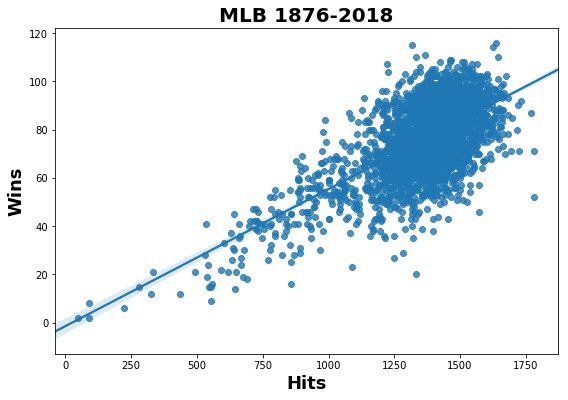

In [16]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="H_x", y="W", data = df)
plt.xlabel('Hits', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W_Hits.png')

## Positive correlation of batting hits with wins.

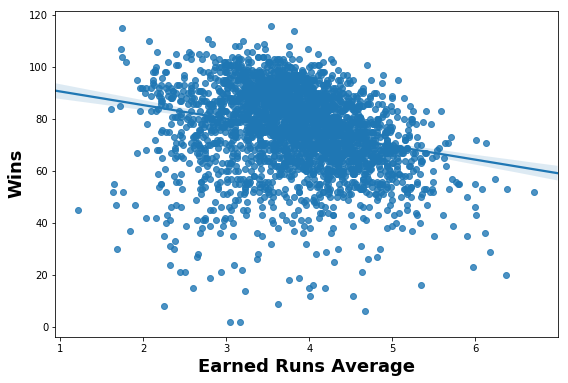

In [17]:
plt.figure(figsize = [9,6]) # [width, height]
#plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="ERA", y="W", data = df)
plt.xlabel('Earned Runs Average', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W_ERA.png')

## And, wins are negatively correlated with Earned Run Average (ERA).

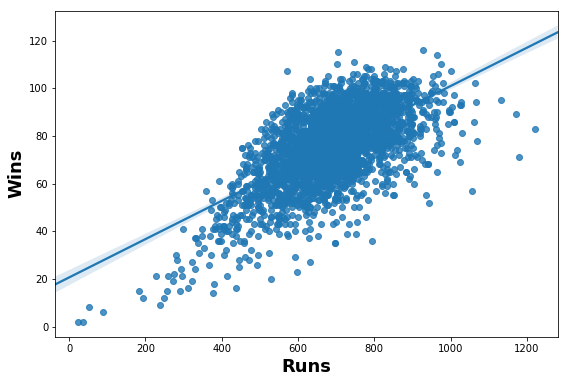

In [18]:
plt.figure(figsize = [9,6]) # [width, height]
#plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="R_x", y="W", data = df)
plt.xlabel('Runs', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W_Runs.png')

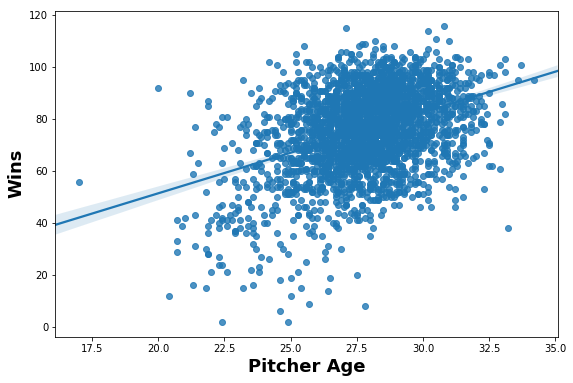

In [19]:
plt.figure(figsize = [9,6]) # [width, height]
#plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="PAge", y="W", data = df)
plt.xlabel('Pitcher Age', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W_PitchAge.png')

## No surprise. Wins are positively correlated with runs. 

## The team wins are weakly positively correlated with the team's pitchers average age which seems to imply that experienced pitchers perform better than their younger counterparts. However, the pitcher's age has only a weak correlation with most of the other pitching statistics. For instance, as shown below in the graph of pitcher's age vs. strikeouts pitched, the correlation between the pitchers age and strikeouts thrown is less than 0.5 for these features.

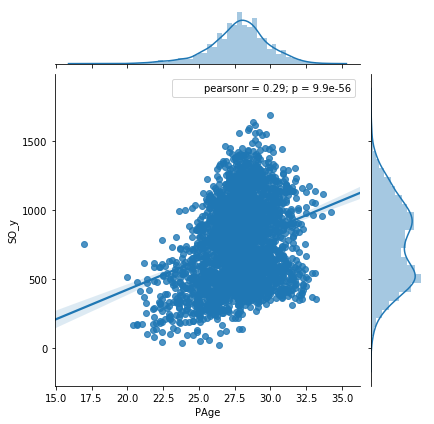

In [20]:
sns.jointplot(data=df,x='PAge', y='SO_y',kind='reg')
#plt.savefig('MLB_SO_PitchAge.png')

In [21]:
predictors = ['W','#Bat','BatAge','G_x','PA','AB', 'R_x','H_x','2B','HR_x']
 
df_1 = df[predictors]

## Heatmap for display of correlation of variables with wins.

## Features that have a strong positive correlation with wins are shaded more purple, while those features that have a negative correlation have a darker blue color.


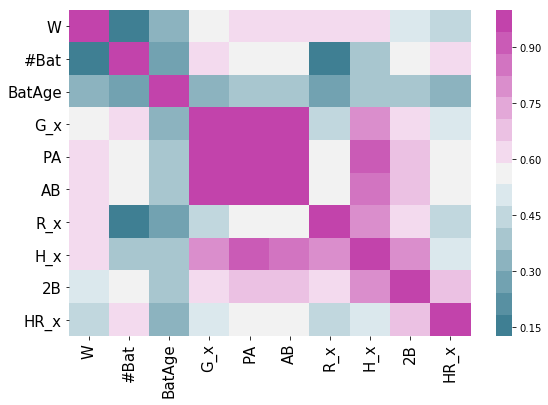

In [22]:
%matplotlib inline 
corr = df_1.corr()
plt.figure(figsize = [9,6]) 
plt.tick_params(labelsize=15)
sns.heatmap(corr, cmap= sns.diverging_palette(220, 320, n=15),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('MLB_W_hmap_1.png')

In [23]:
corr

,W,#Bat,BatAge,G_x,PA,AB,R_x,H_x,2B,HR_x
W,1.000000,0.178940,0.352487,0.582830,0.629993,0.599076,0.626056,0.649828,0.509120,0.447111
#Bat,0.178940,1.000000,0.258566,0.595320,0.579680,0.577388,0.126389,0.406306,0.548037,0.648376
BatAge,0.352487,0.258566,1.000000,0.356100,0.390164,0.368613,0.286743,0.395255,0.374820,0.319800
G_x,0.582830,0.595320,0.356100,1.000000,0.979475,0.979470,0.428928,0.806721,0.611673,0.517051
PA,0.629993,0.579680,0.390164,0.979475,1.000000,0.990543,0.562848,0.883688,0.690704,0.564084
AB,0.599076,0.577388,0.368613,0.979470,0.990543,1.000000,0.541059,0.882526,0.688636,0.560683
R_x,0.626056,0.126389,0.286743,0.428928,0.562848,0.541059,1.000000,0.771996,0.644847,0.465963
H_x,0.649828,0.406306,0.395255,0.806721,0.883688,0.882526,0.771996,1.000000,0.779155,0.497800
2B,0.509120,0.548037,0.374820,0.611673,0.690704,0.688636,0.644847,0.779155,1.000000,0.651040
HR_x,0.447111,0.648376,0.319800,0.517051,0.564084,0.560683,0.465963,0.497800,0.651040,1.000000


In [24]:
predictors2 = ['W','BB_x','SO_x','OPS+','TB','#P','BB_y','BF','BK','CG','ER']

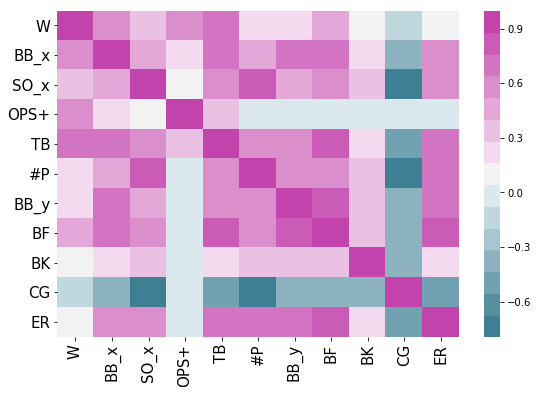

In [25]:
df_2 = df[predictors2]

%matplotlib inline
plt.figure(figsize = [9,6]) 
#plt.fontweight = 'bold'
plt.tick_params(labelsize=15)
corr = df_2.corr()
sns.heatmap(corr,cmap= sns.diverging_palette(220,320, n=15),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('MLB_W_hmap_2.png')
#plt.xlabel(fontweight='bold')
#plt.ylabel(fontweight='bold')


In [26]:
corr

,W,BB_x,SO_x,OPS+,TB,#P,BB_y,BF,BK,CG,ER
W,1.000000,0.586737,0.304754,0.549647,0.649951,0.186490,0.237272,0.503418,0.119359,-0.175771,0.081558
BB_x,0.586737,1.000000,0.440274,0.248150,0.705919,0.439710,0.705966,0.743384,0.220830,-0.370608,0.584361
SO_x,0.304754,0.440274,1.000000,0.056484,0.585641,0.790572,0.453307,0.585642,0.359676,-0.793676,0.522401
OPS+,0.549647,0.248150,0.056484,1.000000,0.398879,0.032084,-0.063885,0.014208,-0.001655,-0.068183,-0.060745
TB,0.649951,0.705919,0.585641,0.398879,1.000000,0.596112,0.626474,0.814244,0.246684,-0.540403,0.744733
#P,0.186490,0.439710,0.790572,0.032084,0.596112,1.000000,0.533250,0.577948,0.289605,-0.761983,0.652916
BB_y,0.237272,0.705966,0.453307,-0.063885,0.626474,0.533250,1.000000,0.796946,0.289484,-0.412511,0.754849
BF,0.503418,0.743384,0.585642,0.014208,0.814244,0.577948,0.796946,1.000000,0.304104,-0.421632,0.769069
BK,0.119359,0.220830,0.359676,-0.001655,0.246684,0.289605,0.289484,0.304104,1.000000,-0.427603,0.257798
CG,-0.175771,-0.370608,-0.793676,-0.068183,-0.540403,-0.761983,-0.412511,-0.421632,-0.427603,1.000000,-0.539682


In [27]:
#predictors3 = ['W','G_y','GF','H_y','HR_y', 'IP','PAge','R_y','SO_y','SV','WP']
predictors3 = ['W','G_y','GF','H_y','HR_y'] # 'IP','PAge','R_y','SO_y','SV','WP']

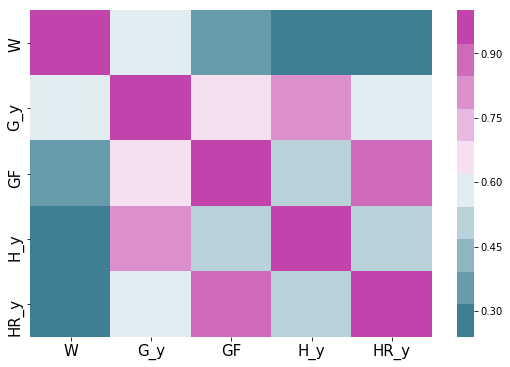

In [28]:
df_3 = df[predictors3]

%matplotlib inline
corr = df_3.corr()
plt.figure(figsize = [9,6])
plt.tick_params(labelsize=15)
#plt.fontweight = 'bold'
sns.heatmap(corr, cmap= sns.diverging_palette(220,320, n=10),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('MLB_W_hmap_3.png')

In [29]:
corr

,W,G_y,GF,H_y,HR_y
W,1.000000,0.582832,0.356504,0.240439,0.256221
G_y,0.582832,1.000000,0.662325,0.793013,0.544427
GF,0.356504,0.662325,1.000000,0.537719,0.875192
H_y,0.240439,0.793013,0.537719,1.000000,0.523020
HR_y,0.256221,0.544427,0.875192,0.523020,1.000000


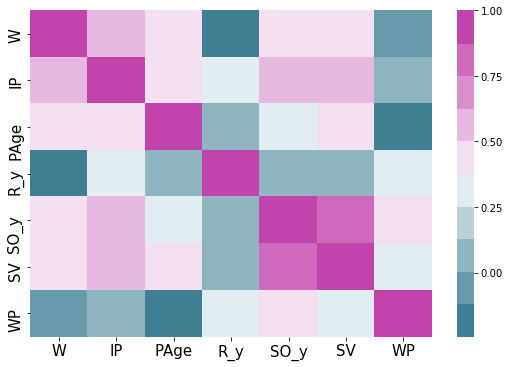

In [30]:
predictors3a = ['W','IP','PAge','R_y','SO_y','SV','WP']
df_3a = df[predictors3a]

%matplotlib inline
corr = df_3a.corr()
plt.figure(figsize = [9,6])
plt.tick_params(labelsize=15)
plt.fontweight = 'bold'
sns.heatmap(corr, cmap= sns.diverging_palette(220,320, n=10),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('MLB_W_hmap_4.png')

In [31]:
corr

,W,IP,PAge,R_y,SO_y,SV,WP
W,1.000000,0.612138,0.390851,-0.162247,0.441019,0.482644,-0.107353
IP,0.612138,1.000000,0.455137,0.358624,0.603618,0.560337,0.031811
PAge,0.390851,0.455137,1.000000,0.063881,0.290143,0.385665,-0.244377
R_y,-0.162247,0.358624,0.063881,1.000000,0.114587,0.104954,0.280456
SO_y,0.441019,0.603618,0.290143,0.114587,1.000000,0.829975,0.431844
SV,0.482644,0.560337,0.385665,0.104954,0.829975,1.000000,0.278116
WP,-0.107353,0.031811,-0.244377,0.280456,0.431844,0.278116,1.000000


## Wins are positively correlated with innings pitched (IP) and the team's average pitchers age.

In [32]:
predictors4 = ['W','R_x','BA','H_x','SV','ERA']

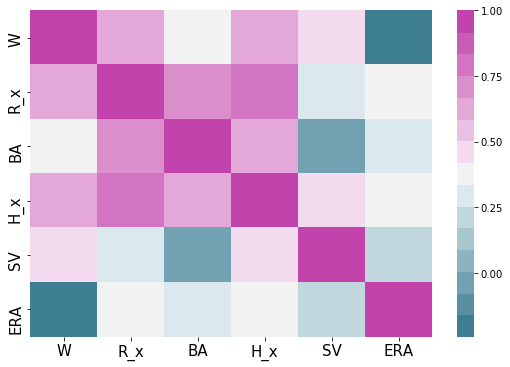

In [33]:
df_4 = df[predictors4]

%matplotlib inline
corr = df_4.corr()
plt.figure(figsize = [9,6])
plt.tick_params(labelsize=15)
sns.heatmap(corr,cmap= sns.diverging_palette(220,320, n=15),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('MLB_W_hmap_5.png')

## As seen before, a teams wins has a strong negative correlation with ERA.

In [34]:
df_4.describe()

,W,R_x,BA,H_x,SV,ERA
count,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000
mean,75.858970,687.988277,0.261003,1361.430906,24.499822,3.819663
std,16.007805,124.826282,0.017170,183.360852,16.181625,0.737716
min,2.000000,24.000000,0.175000,49.000000,0.000000,1.220000
25%,67.000000,618.000000,0.250000,1308.000000,10.000000,3.360000
50%,77.000000,691.000000,0.260000,1395.000000,25.000000,3.820000
75%,87.000000,763.000000,0.271000,1465.500000,38.000000,4.295000
max,116.000000,1220.000000,0.350000,1783.000000,68.000000,6.710000


In [35]:
corr

,W,R_x,BA,H_x,SV,ERA
W,1.000000,0.626056,0.353061,0.649828,0.482644,-0.242158
R_x,0.626056,1.000000,0.703117,0.771996,0.261525,0.366013
BA,0.353061,0.703117,1.000000,0.599693,-0.039140,0.262993
H_x,0.649828,0.771996,0.599693,1.000000,0.424374,0.387276
SV,0.482644,0.261525,-0.039140,0.424374,1.000000,0.245143
ERA,-0.242158,0.366013,0.262993,0.387276,0.245143,1.000000


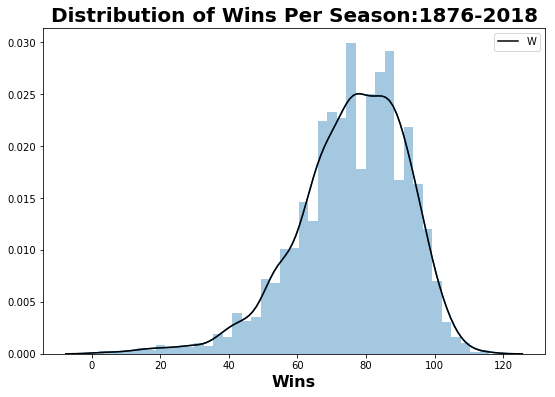

In [36]:
plt.figure(figsize = [9,6])
sns.distplot(df.W) 
sns.kdeplot(df.W, color="black")
plt.xlabel('Wins', weight = 'bold',size =16)
plt.title("Distribution of Wins Per Season:1876-2018",weight = 'bold',size =20)
#plt.savefig('MLB_W_distribution.png')

## The distribution of team wins in a season has a relatively normal distribution  that is left-skewed somewhat.
